In [1]:
import io
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Sentences.csv to Sentences.csv


## **Question 2.1) Count Number of Words and Phrases**

Preprocessing:
1. Remove special character, set to lowercase

In [4]:
import nltk
def remove_punctuation(text):
    """
    Removes all punctuation and conotation from the string and returns a 'plain' string
    """
    punctuation = "-&"+"®©™€â´‚³©¥ã¼•ž®è±äüöž!@#Â“§$%^*()î_+€$=¿{”}[]:«;»\â¢|<>,.?/~`0123456789"
    for sign in punctuation:
        text = text.replace(sign, "")
        text = text.replace("'s", "s")
    return text

sentences = pd.read_csv(io.BytesIO(uploaded['Sentences.csv']))
sentences = pd.DataFrame(sentences.apply(lambda row: (row['Sentences']).lower(), axis=1))
sentences.columns = ["Sentences"]
sentences = pd.DataFrame(sentences.apply(lambda row: (remove_punctuation(row['Sentences'])), axis=1))
sentences.columns = ["Sentences"]
sentences

,Sentences
0,during the group’s operation witnessed a seri...
1,according to the national bureau of statistics...
2,on a quarterly basis china’s gross domestic pr...
3,on a yearonyear basis singapores gross domesti...
4,according to the publication of the national b...
...,...
7556,under the minerals law a deposit that may hav...
7557,the minerals law defines a mineral deposit of...
7558,according to the statistics available at the o...
7559,an acronym for gross domestic product


Tokenize Sentences

In [7]:
from nltk.tokenize import word_tokenize

words = pd.DataFrame(sentences.apply(lambda row: word_tokenize(row['Sentences']), axis=1))
words.columns = ["Sentences"]

Count Words per Sentence

In [13]:
word_length = words.apply(lambda row: len(row['Sentences']), axis=1)
word_show = pd.DataFrame(word_length)
word_show.columns = ["Count"]
word_show

,Count
0,56
1,25
2,24
3,20
4,43
...,...
7556,52
7557,61
7558,43
7559,6


Count occurrences of top 100 bigram phrases

In [15]:
from collections import Counter
import matplotlib.pyplot as plt
import string
import functools
import operator

words_list = functools.reduce(operator.iconcat, words.values, [])
words_list = functools.reduce(operator.iconcat, words_list, [])

bigram_df = pd.DataFrame(columns=["Words", "Count"]) # initialize dataframe with two columns
bigram_count_dict = dict(Counter(nltk.ngrams(words_list,2)).most_common(100))

for key, val in bigram_count_dict.items():
      # append row to the dataframe
    new_row = {"Words": ' '.join(key), "Count":val}
    bigram_df = bigram_df.append(new_row, ignore_index=True)
bigram_df

,Words,Count
0,domestic product,7579
1,gross domestic,7575
2,in the,3846
3,product gdp,3748
4,of the,3316
...,...,...
95,of approximately,258
96,period of,258
97,product grew,258
98,the economic,257


Count occurrences of top 100 trigram phrases

In [16]:
#Count occurrences of top 100 bigram phrases
trigram_df = pd.DataFrame(columns=["Words", "Count"])
trigram_count_dict = dict(Counter(nltk.ngrams(words_list,3)).most_common(100))

for key, val in trigram_count_dict.items():
      # append row to the dataframe
    new_row = {"Words": ' '.join(key), "Count":val}
    trigram_df = trigram_df.append(new_row, ignore_index=True)
trigram_df

,Words,Count
0,gross domestic product,7563
1,domestic product gdp,3748
2,the gross domestic,2073
3,china ’ s,1845
4,’ s gross,1764
...,...,...
95,same period last,195
96,the people ’,190
97,of hong kong,190
98,republic of china,189


Count occurrences of top 100 quadgram phrases

In [17]:
quadgram_df = pd.DataFrame(columns=["Phrases", "Count"]) # initialize dataframe with two columns
quadgram_count_dict = dict(Counter(nltk.ngrams(words_list,3)).most_common(25))

for key, val in quadgram_count_dict.items():
      # append row to the dataframe
    new_row = {"Phrases": ' '.join(key), "Count":val}
    quadgram_df = quadgram_df.append(new_row, ignore_index=True)
quadgram_df

,Phrases,Count
0,gross domestic product,7563
1,domestic product gdp,3748
2,the gross domestic,2073
3,china ’ s,1845
4,’ s gross,1764
5,s gross domestic,1762
6,the first half,1539
7,first half of,1487
8,in the first,1393
9,bureau of statistics,1181


Visualize Number of Words and Phrases (Answer to Q2.1)

Text(0, 0.5, 'Count')

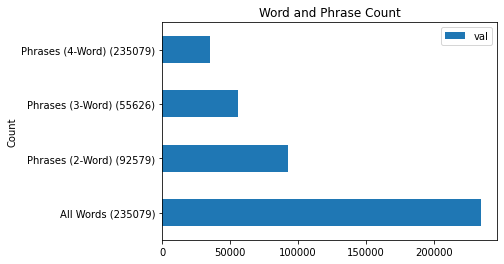

In [18]:
count = pd.DataFrame({'lab':["All Words (%d)" % sum(word_length), "Phrases (2-Word) (%d)" % sum(bigram_df["Count"]), 
                             "Phrases (3-Word) (%d)" % sum(trigram_df["Count"]), "Phrases (4-Word) (%d)" % sum(word_length)], 
                      'val':[sum(word_length), sum(bigram_df["Count"]), sum(trigram_df["Count"]), sum(quadgram_df["Count"])]})
count.plot.barh(x='lab', y='val')

plt.title("Word and Phrase Count")
plt.ylabel("Count")

## **Question 2.3) Poor Quality Sentences**


Proposed Method:
1. Tokenize words and sentences
2. Calculate frequency of each word
3. Find the weighted frequency of each sentence. Add the frequency of each important word found in the sentence.


Tokenize words and sentences

In [19]:
sentences_list = sentences["Sentences"].to_list()
sentences_string = functools.reduce(operator.iconcat, sentences_list, [])
sentences_string = "".join(sentences_list)
tokens = word_tokenize(sentences_string)

In [38]:
tokens = word_tokenize(sentences_string)
tokens[:3]

['during', 'the', 'group']

In [41]:
sentences_list[:3]

['during  the group’s operation witnessed a series of favorable factors with several major indices closely related to toll road traffic volume in the respective locations of each toll road projects such as gross domestic product gdp cargo and passenger turnovers by means of toll road transportation and car ownership of residents reported rapid growth',
 'according to the national bureau of statistics of china china’s gross domestic product in the first half of  amounted approximately to rmb trillion',
 'on a quarterly basis china’s gross domestic product in the first quarter fell by  yearonyear and in the second quarter increased by ']

Calculate frequency of each word

In [40]:
word_frequencies = Counter(tokens)

for word in word_frequencies.keys():
    word_frequencies[word] = word_frequencies[word]/max(word_frequencies.values())
word_frequencies

Counter({'during': 0.01858844031367993,
         'the': 1.0,
         'group': 0.030618017253570922,
         '’': 0.24579267430349314,
         's': 0.22698345354263894,
         'operation': 0.00205062933107057,
         'witnessed': 0.0007071135624381275,
         'a': 0.27697638240701455,
         'series': 0.001131381699901004,
         'of': 1.0,
         'favorable': 0.0021937842778793418,
         'factors': 0.017062766605728214,
         'with': 0.23254113345521024,
         'several': 0.0001218769043266301,
         'major': 0.018403412553321147,
         'indices': 0.0001218769043266301,
         'closely': 0.00036563071297989033,
         'related': 0.0042656916514320535,
         'to': 0.6821450335161486,
         'toll': 0.0032906764168190127,
         'road': 0.001218769043266301,
         'traffic': 0.0017062766605728215,
         'volume': 0.0029250457038391227,
         'in': 1.0,
         'respective': 0.0010253781081773904,
         'locations': 0.000640861317610869

Find weighted frequency of each sentence

In [43]:
sentence_scores = {}
for sent in sentences_list:
    sentence = sent.split(" ")
    for word in sentence:        
        if word in word_frequencies.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[sent] = word_frequencies[word.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.lower()]

dict(list(sentence_scores.items())[0:3])

{'according to the national bureau of statistics of china china’s gross domestic product in the first half of  amounted approximately to rmb trillion': 42.43128066754672,
 'during  the group’s operation witnessed a series of favorable factors with several major indices closely related to toll road traffic volume in the respective locations of each toll road projects such as gross domestic product gdp cargo and passenger turnovers by means of toll road transportation and car ownership of residents reported rapid growth': 15.96099681457377,
 'on a quarterly basis china’s gross domestic product in the first quarter fell by  yearonyear and in the second quarter increased by ': 34.37013388061624}

Choose the worst 10% of the sentences lowest weighted scores

In [44]:
from heapq import nlargest
select_length = int(len(sentences_list)*0.1)
worst_summary = nlargest(select_length, sentence_scores, key = sentence_scores.get)
print("%d sentences selected." % 756, "Poorest quality sentences (worst 10%): ")
worst_summary[:10]

756 sentences selected. Poorest quality sentences (worst 10%): 


['for instance if forecast economic conditions ie gross domestic product are expected to deteriorate over the next year which can lead to an increased number of defaults in the manufacturing sector the historical default rates are adjusted',
 'raw material for iron ore concentrate isometric mineral fe jewish autonomous region an oblast of the russian federation earnings before interest tax depreciation and amortisation engineering procurement and construction contract method by which ore deposits are evaluated the chemical symbol for iron an extensive technical and financial study to assess the commercial viability of a project a mineral process used to separate mineral particles in a slurry by causing them to selectively adhere to a froth and float to the surface incoterm free on board gross domestic product general nice development limited is a hong kong incorporated holding company which trades and produces steel raw material commodities in china and globally prospecting techniques 

## **Q2.3) Sentence Similarity**

Proposed Method:
1. Apply sentence grouping using BERT model
2. Generate one word categories that best represent the article </br>
</br>
  2a) Use the weighted word scores generated from Q2.2) to identify the top-scoring words </br>
  2b) Use POS tagging to tag each word</br>
  2c) Compile POS tags that offer little contextual meaning. For example, DT (Determiners) such as "the".</br>
  2d) Filter out words that are associated to the POS tags selected in 2c)</br>
  </br>
3. Select top 5 scored words (selecting more with lead to more specific sentence pairs, but it is computationally expensive and requires better optimization) as master categories. 
4. The BERT model with produce the sentences that are best associated to each category.

In [52]:
best_summary = nlargest(select_length, sentence_scores, key = sentence_scores.get)
best_summary = functools.reduce(operator.iconcat, best_summary, [])
best_summary = "".join(best_summary)

best_tokens = word_tokenize(best_summary)
best_word_frequencies = Counter(best_tokens)

for word in best_word_frequencies.keys():
    best_word_frequencies[word] = best_word_frequencies[word]/max(best_word_frequencies.values())

best_word_df = pd.DataFrame(sorted(best_word_frequencies.items(), key=lambda x: x[1]))
best_word_df.columns = ["Word", "Score"]
best_word_df.tail(10)

,Word,Score
2722,amount,1.0
2723,competitive,1.0
2724,averaged,1.0
2725,resilient,1.0
2726,sectorsaccording,1.0
2727,tourists,1.0
2728,sectorsduring,1.0
2729,china–united,1.0
2730,gave,1.0
2731,spots,1.0


In [58]:
pos_tags = pd.DataFrame(nltk.pos_tag(best_tokens))
pos_tags.columns = ["Word", "Tag"]
scoretag = pd.merge(best_word_df, pos_tags, on='Word').drop_duplicates(subset=['Word'])
scoretag = scoretag.query('Tag not in ["ADP", "AUX", "CCONJ", "NUM", "PART", "SCONJ", "RP", "PDT", "WDT", "WP", "WP$", "WRB", "IN", "CC", "DT"]')
token_count = pd.DataFrame(sorted(Counter(tokens).items(), key=lambda x: x[1]))
token_count.columns = ["Word", "Token_Occurences"]

In [61]:
master_group = pd.merge(scoretag, token_count, on='Word').drop_duplicates(subset=['Word'])
master_group = master_group.sort_values(["Score", "Token_Occurences"], ascending = (False, False))
master_group.head(20)

,Word,Score,Tag,Token_Occurences
2434,growth,1.0,NN,4925
2435,gdp,1.0,NN,4264
2436,first,1.0,JJ,2513
2437,half,1.0,NN,1730
2438,rmb,1.0,JJ,1624
2439,compared,1.0,VBN,982
2440,billion,1.0,CD,766
2442,amounted,1.0,VBD,376
2441,decrease,1.0,NN,256
2443,rose,1.0,VBD,189


In [62]:
import itertools

input_text = sentences_list
Master_Groups = master_group["Word"].values.tolist()[0:20]

listoflists=[i.split(',') for i in input_text]
merged = list(itertools.chain.from_iterable(listoflists))
all=[x.strip() for x in merged]
unique_text=list(set(all))
unique_text

edit_text = []
for i in range(0, len(unique_text)):
  s = ""
  for word in unique_text[i].split():
    if word in list(master_group["Word"]):
      s+= word+" "
  edit_text.append(s)

BERT Model takes 1hr+ for the entire text. For convenience and reproducibility, 30 sentences from the text have been sampled to find similar sentences

In [65]:
#Sample

import random
random.seed(10)

sample_size = 40
#Uncomment to intialize sample
#edit_text = random.sample(edit_text, sample_size)

In [ ]:
#!pip install git+https://github.com/AndriyMulyar/semantic-text-similarity

In [69]:
print('loading Model......')
from semantic_text_similarity.models import WebBertSimilarity
from semantic_text_similarity.models import ClinicalBertSimilarity

web_model = WebBertSimilarity(device='cpu', batch_size=10) #defaults to GPU prediction

clinical_model = ClinicalBertSimilarity(device='cuda', batch_size=10) #defaults to GPU prediction

print('Predicting Ip_text......')
def Model_prediction(unique_input_item,master_category):
    out=[]
    count = 0
    for i in unique_input_item:
        bst=[]
        for mstr in master_category:
            val=web_model.predict([(mstr,i)])
            bst.append(val.tolist())
        count+=1
        d=dict(zip(master_category,bst))
        category=list(dict(sorted(d.items(), key=lambda x: x[1], reverse=True)[:1]).keys())
        out.append(category)
    
    return out
out=Model_prediction(edit_text,Master_Groups)

loading Model......
Predicting Ip_text......


In [70]:
out_sep = list(itertools.chain.from_iterable(out))
dfout=pd.DataFrame([edit_text,out_sep]).T
dfout=dfout.rename(columns={0:'Input',1:'Application_Type'})
dfout.head()

,Input,Application_Type
0,given tertiary industry accounted gross domest...,industries
1,according to data national bureau statistics n...,growth
2,first half gross domestic product gdp amounted...,gdp
3,year has started increasing signs recession ot...,decrease
4,instance forecast economic conditions ie gross...,decrease


In [71]:
dfout = dfout.groupby('Application_Type')['Input'].apply(list).reset_index(name='Similar')
dfout

,Application_Type,Similar
0,amount,[hong gross domestic product is forecast to co...
1,decrease,[year has started increasing signs recession o...
2,gdp,[first half gross domestic product gdp amounte...
3,growth,[according to data national bureau statistics ...
4,industries,[given tertiary industry accounted gross domes...
5,rmb,[gross domestic product year amounted to appro...


In [77]:
print("Similar pairs of sentences: ")
for i in dfout["Similar"]:
  if len(i) > 1:
    print(i[:2])

Similar pairs of sentences: 
['year has started increasing signs recession other major economies world prc property market continued to slow backdrop third consecutive decline prc gross domestic product quarterly growth rate first quarter ', 'instance forecast economic conditions ie gross domestic product are expected to deteriorate next year can lead to increased number defaults sector historical default rates are adjusted ']
['first half gross domestic product gdp amounted to rmb billion yearonyear basis ', 'economy experienced slower growth rate period gross domestic product gdp growing compared same period last year was also lower market expectations ']
['according to data national bureau statistics national gross domestic product growth is national disposable income capita deducting price factors recorded increase is similar to growth gross domestic product ', 'six months ended period gross domestic product republic china prc grew first quarter second quarter ']
['gross domestic p

In [ ]:
import numpy as np
print('Mapping IP & Output.......')

def Mapping_input_and_predicted_output(Ip_listoflist,Master_cat):
    strp=[]
    for one in np.arange(len(Ip_listoflist)):
        val=[i.strip() for i in Ip_listoflist[one]]
        strp.append(val)
    print(strp)
    strp = functools.reduce(operator.iconcat, strp, [])
    oop=[]
    for item in strp:
        op=[]
        for key, value in Master_cat.items():
            for segment in value:
              for word in segment:
                if  word in item:
                    op.append(key)
        oop.append(op)
    return strp, oop

input_string,master_grop= Mapping_input_and_predicted_output(listoflists,master_mapping)
input_string[:6]

Mapping IP & Output.......
[['during  the group’s operation witnessed a series of favorable factors with several major indices closely related to toll road traffic volume in the respective locations of each toll road projects such as gross domestic product gdp cargo and passenger turnovers by means of toll road transportation and car ownership of residents reported rapid growth'], ['according to the national bureau of statistics of china china’s gross domestic product in the first half of  amounted approximately to rmb trillion'], ['on a quarterly basis china’s gross domestic product in the first quarter fell by  yearonyear and in the second quarter increased by'], ['on a yearonyear basis singapores gross domestic product gdp contracted by  in q  an improvement from a  contraction in q'], ['according to the publication of the national bureau of statistics of china gross domestic product of china increased by  in the first half of  when compared to the first half  of    while  domestic 

['during  the group’s operation witnessed a series of favorable factors with several major indices closely related to toll road traffic volume in the respective locations of each toll road projects such as gross domestic product gdp cargo and passenger turnovers by means of toll road transportation and car ownership of residents reported rapid growth',
 'according to the national bureau of statistics of china china’s gross domestic product in the first half of  amounted approximately to rmb trillion',
 'on a quarterly basis china’s gross domestic product in the first quarter fell by  yearonyear and in the second quarter increased by',
 'on a yearonyear basis singapores gross domestic product gdp contracted by  in q  an improvement from a  contraction in q',
 'according to the publication of the national bureau of statistics of china gross domestic product of china increased by  in the first half of  when compared to the first half  of    while  domestic  income  from  food  and  bevera

In [ ]:
result=[list(i) for i in [set(x) for x in master_grop]]

finaldf=pd.DataFrame([input_string,result]).T
finaldf[1]=finaldf[1].astype(str).str.replace('\[|\]|\'', '')
Output=finaldf.rename(columns={0:'Input',1:'Mapped_Master_Type'})
#Output.to_excel('output.xlsx')
Output.head(10)

,Input,Mapped_Master_Type
0,during the group’s operation witnessed a seri...,"decrease, gaming, growth, billion, industries,..."
1,according to the national bureau of statistics...,"decrease, gaming, growth, billion, industries,..."
2,on a quarterly basis china’s gross domestic pr...,"decrease, gaming, growth, billion, industries,..."
3,on a yearonyear basis singapores gross domesti...,"decrease, gaming, growth, billion, industries,..."
4,according to the publication of the national b...,"decrease, gaming, growth, billion, industries,..."
5,singapore’s economy had performed remarkably w...,"decrease, gaming, growth, billion, industries,..."
6,due to the growth in gross domestic product in...,"decrease, gaming, growth, billion, industries,..."
7,commenting on the results straco’s executive c...,"decrease, gaming, growth, billion, industries,..."
8,moreover individual foreign economies may ...,"decrease, gaming, growth, billion, industries,..."
9,in guangzhou’s gross domestic product gdp gre...,"decrease, gaming, growth, billion, industries,..."


## **Question 2.4) One Phrase Summary**

Proposed Method:
Take the most occuring 4 letter phrase

In [60]:
phrase_df = pd.DataFrame(columns=["Phrases", "Count"]) # initialize dataframe with two columns
phrase_count_dict = dict(Counter(nltk.ngrams(words_list, 6)).most_common(5))

for key, val in phrase_count_dict.items():
      # append row to the dataframe
    new_row = {"Phrases": ' '.join(key), "Count":val}
    phrase_df = phrase_df.append(new_row, ignore_index=True)
print("One phrase summary: ")
phrase_df.iloc[0,0]

One phrase summary: 


'china ’ s gross domestic product'